In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.model_selection import train_test_split # for splitting data between train and test

# Part 1: Intro to Pandas with Housing Data

## House Sales for King County (May 2014 - May 2015)

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

- `id`: Unique ID for each home sold
- `date`: Date of the home sale
- `price`: Price of each home sold
- `bedrooms`: Number of bedrooms
- `bathrooms`: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- `sqft_living`: Square footage of the apartments interior living space
- `sqft_lot`: Square footage of the land space
- `floors`: Number of floors
- `waterfront`: A dummy variable for whether the apartment was overlooking the waterfront or not
- `view`: An index from 0 to 4 of how good the view of the property was
- `condition`: An index from 1 to 5 on the condition of the apartment,
- `grade`: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- `sqft_above`: The square footage of the interior housing space that is above ground level
- `sqft_basement`: The square footage of the interior housing space that is below ground level
- `yr_built`: The year the house was initially built
- `yr_renovated`: The year of the house’s last renovation
- `zipcode`: What zipcode area the house is in
- `lat`: Lattitude
- `long`: Longitude
- `sqft_living15`: The square footage of interior housing living space for the nearest 15 neighbors
- `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

## Loading & Exploring data

In [189]:
df = pd.read_csv('lab1_data.csv')
df.head() # look at first few rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [191]:
df.shape # dimensions (num rows, num columns)

(21613, 21)

In [193]:
df.describe() # summary data for each column (some don't make sense)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


** Think #1 ** For which columns are these summary statistics actually useful?

## Selecting data

In [197]:
df.loc[25:100] # get rows 25 - 100 (kind of pointless...)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
25,1202000200,20141103T000000,233000.0,3,2.00,1710,4697,1.5,0,0,...,6,1710,0,1941,0,98002,47.3048,-122.218,1030,4705
26,1794500383,20140626T000000,937000.0,3,1.75,2450,2691,2.0,0,0,...,8,1750,700,1915,0,98119,47.6386,-122.360,1760,3573
27,3303700376,20141201T000000,667000.0,3,1.00,1400,1581,1.5,0,0,...,8,1400,0,1909,0,98112,47.6221,-122.314,1860,3861
28,5101402488,20140624T000000,438000.0,3,1.75,1520,6380,1.0,0,0,...,7,790,730,1948,0,98115,47.6950,-122.304,1520,6235
29,1873100390,20150302T000000,719000.0,4,2.50,2570,7173,2.0,0,0,...,8,2570,0,2005,0,98052,47.7073,-122.110,2630,6026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3422049190,20150330T000000,247500.0,3,1.75,1960,15681,1.0,0,0,...,7,1960,0,1967,0,98032,47.3576,-122.277,1750,15616
97,1099611230,20140912T000000,199000.0,4,1.50,1160,6400,1.0,0,0,...,7,1160,0,1975,0,98023,47.3036,-122.378,1160,6400
98,722079104,20140711T000000,314000.0,3,1.75,1810,41800,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036
99,7338200240,20140516T000000,437500.0,3,2.50,2320,36847,2.0,0,2,...,9,2320,0,1992,0,98045,47.4838,-121.714,2550,35065


In [199]:
df.loc[371, 'price'] # get price of 371st row

315000.0

In [201]:
df.iloc[25:100, 0:5] # get 25th-100th rows and first 5 columns

,id,date,price,bedrooms,bathrooms
25,1202000200,20141103T000000,233000.0,3,2.00
26,1794500383,20140626T000000,937000.0,3,1.75
27,3303700376,20141201T000000,667000.0,3,1.00
28,5101402488,20140624T000000,438000.0,3,1.75
29,1873100390,20150302T000000,719000.0,4,2.50
...,...,...,...,...,...
95,1483300570,20140908T000000,905000.0,4,2.50
96,3422049190,20150330T000000,247500.0,3,1.75
97,1099611230,20140912T000000,199000.0,4,1.50
98,722079104,20140711T000000,314000.0,3,1.75


## Sorting data & filtering (w/ Boolean indexing)

In [204]:
df_by_price = df.sort_values(by='price') # sort data by price column
df_by_price.head() # show cheapest homes

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250


In [206]:
max_price = 100000
df_by_price[df_by_price['price'] <= max_price] # show homes with price <= max_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
2141,1623049041,20140508T000000,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
18468,7999600180,20140529T000000,83000.0,2,1.00,900,8580,1.0,0,0,...,5,900,0,1918,0,98168,47.4727,-122.270,2060,6533
3767,1523049188,20150430T000000,84000.0,2,1.00,700,20130,1.0,0,0,...,6,700,0,1949,0,98168,47.4752,-122.271,1490,18630
16714,1322049150,20150305T000000,85000.0,2,1.00,910,9753,1.0,0,0,...,5,910,0,1947,0,98032,47.3897,-122.236,1160,7405
10253,2422049104,20140915T000000,85000.0,2,1.00,830,9000,1.0,0,0,...,6,830,0,1939,0,98032,47.3813,-122.243,1160,7680


In [208]:
df_by_price[df_by_price['waterfront'] == 1] # show homes with waterfront view

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18275,2781600195,20141117T000000,285000.0,1,1.00,1060,54846,1.0,1,4,...,5,1060,0,1935,0,98070,47.4716,-122.445,2258,31762
1168,3523029041,20141009T000000,290000.0,2,0.75,440,8313,1.0,1,3,...,5,440,0,1943,0,98070,47.4339,-122.512,880,26289
16570,2923039243,20141113T000000,340000.0,4,1.00,1200,11834,1.0,1,3,...,6,1200,0,1972,0,98070,47.4557,-122.443,1670,47462
6102,222029026,20140917T000000,340000.0,2,0.75,1060,48292,1.0,1,2,...,6,560,500,1947,0,98070,47.4285,-122.511,750,80201
11556,2013802030,20140911T000000,357000.0,3,2.00,2460,53882,1.0,1,4,...,7,2460,0,1955,0,98198,47.3811,-122.325,2660,32625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619


### TODO #1
Get all homes with more than 8 bedrooms and sort by price. What do you notice about the relationship between price and bedrooms? Looking at these homes, what columns seem to associate with higher price?

In [211]:
homes_over_8_rooms = df_by_price[df_by_price['bedrooms'] > 8]
homes_over_8_rooms

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
4096,1997200215,20140507T000000,599999.0,9,4.50,3830,6988,2.5,0,0,...,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
4235,2902200015,20150106T000000,700000.0,9,3.00,3680,4400,2.0,0,0,...,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450
18443,8823901445,20150313T000000,934000.0,9,3.00,2820,4480,2.0,0,0,...,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
6079,9822700190,20140808T000000,1280000.0,9,4.50,3650,5000,2.0,0,0,...,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000


There doesn't seem to be a straightforward relationship between the number of bedrooms and the price within this subset, as the most expensive house does not have the most bedrooms. It seems that the grade show some relation to the price - the highest-priced homes in the above subset also have the highest grades. While grade might influence price, it's not the sole determinant.

## Operations & adding columns

In [215]:
df['price'].mean() # mean price of home

540088.1417665294

In [217]:
df['price'].describe() # more summary statistics for home prices

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [219]:
df['price_per_sqft'] = df['price'] / df['sqft_living'] # add new column to get price / sqft (interior)

In [221]:
current_year = 2021
df['age'] = df['yr_built'].apply(lambda yr: current_year - yr) # get age of house by applying function to each value in series

# df['age'] = current_year - df['yr_built'] # equivalent command (but I had to show y'all apply)

In [223]:
hist_bed = df['bedrooms'].value_counts() # frequency count of number of houses with same number of bedrooms (about that mansion...)
hist_bed = hist_bed.sort_index() # sort by index (num of bedrooms)

(array([9., 1., 1., 0., 0., 0., 0., 1., 0., 1.]),
 array([1.0000e+00, 9.8330e+02, 1.9656e+03, 2.9479e+03, 3.9302e+03,
        4.9125e+03, 5.8948e+03, 6.8771e+03, 7.8594e+03, 8.8417e+03,
        9.8240e+03]),
 <BarContainer object of 10 artists>)

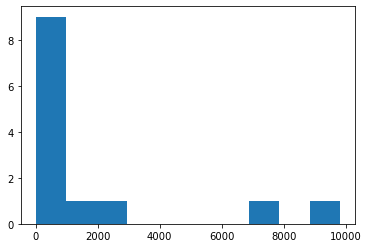

In [225]:
plt.hist(df['bedrooms'].value_counts()) # plot histogram

## Grouping

In [228]:
df.groupby('waterfront').apply(lambda grp: grp.mean())# group by waterfront and look at means for each column

/tmp/ipykernel_1050/3393052474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.groupby('waterfront').apply(lambda grp: grp.mean())# group by waterfront and look at means for each column


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,age
waterfront,,,,,,,,,,,,,,,,,,,,,
0,4.580984e+09,5.315636e+05,3.371375,2.110478,2071.587972,15028.964196,1.493193,0.0,0.207459,3.408485,...,288.400000,1971.072121,81.149930,98077.798555,47.560225,-122.213382,1981.386667,12695.378089,262.302879,49.927879
1,4.490512e+09,1.661876e+06,3.300613,2.677914,3173.687117,25371.828221,1.641104,1.0,3.766871,3.533742,...,700.644172,1962.190184,512.392638,98096.527607,47.537364,-122.281601,2666.349693,22385.104294,508.096412,58.809816


### TODO #2

1) Group homes by number of floors and get median of each row for each group. What do you notice?

2) For homes that have been renovated, plot a histogram grouping homes by year built. (assuming 0.0 means home was never renovated)

In [231]:
# 2.1
median_floor = df.groupby('floors').apply(lambda grp: grp.median())
median_floor

/tmp/ipykernel_1050/3950524138.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_floor = df.groupby('floors').apply(lambda grp: grp.median())


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,age
floors,,,,,,,,,,,,,,,,,,,,,
1.0,3.884801e+09,390000.0,3.0,1.750,1630.0,8337.0,1.0,0.0,0.0,3.0,...,200.0,1962.0,0.0,98070.0,47.56150,-122.2650,1680.0,8173.5,242.187500,59.0
1.5,3.856905e+09,524475.0,3.0,1.750,1760.0,5962.5,1.5,0.0,0.0,4.0,...,0.0,1928.0,0.0,98115.0,47.62850,-122.3085,1660.0,5700.0,288.289458,93.0
2.0,3.982700e+09,542950.0,4.0,2.500,2440.0,7089.0,2.0,0.0,0.0,3.0,...,0.0,1998.0,0.0,98055.0,47.56410,-122.1680,2260.0,7113.0,233.644860,23.0
2.5,3.751602e+09,799200.0,4.0,2.500,2850.0,5474.0,2.5,0.0,0.0,3.0,...,60.0,1977.0,0.0,98106.0,47.61870,-122.2950,2240.0,5352.0,297.235023,44.0
3.0,3.448000e+09,490000.0,3.0,2.500,1500.0,1323.0,3.0,0.0,0.0,3.0,...,0.0,2007.0,0.0,98109.0,47.67120,-122.3460,1470.0,1466.0,325.963719,14.0
3.5,1.972201e+09,534500.0,3.0,2.625,1730.0,1331.0,3.5,0.0,0.0,3.0,...,0.0,2005.5,0.0,98104.0,47.65295,-122.3335,1405.0,1331.0,333.233444,15.5


After grouping homes by the number of floors and calculating the median for each attribute, we observed the following trends:  
(1) Homes with 2.5 floors tend to have the highest median price(799200.0).  
(2) A higher number of floors doesn’t necessarily mean more bedrooms or bathrooms.  
(3) The median living space tends to increase with the number of floors, but homes with 3 and 3.5 floors are an exception with smaller living spaces.  
(4) The lot size generally decreases as the number of floors increases.  

In [234]:
# 2.2
renovated = df[df['yr_renovated'] > 0]
renovated

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,age
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,70
35,9547205180,20140613T000000,696000.0,3,2.50,2300,3060,1.5,0,0,...,790,1930,2002,98115,47.6827,-122.310,1590,3264,302.608696,91
95,1483300570,20140908T000000,905000.0,4,2.50,3300,10250,1.0,0,0,...,910,1946,1991,98040,47.5873,-122.249,1950,6045,274.242424,75
103,2450000295,20141007T000000,1088000.0,3,2.50,2920,8113,2.0,0,0,...,0,1950,2010,98004,47.5814,-122.196,2370,8113,372.602740,71
115,3626039325,20141121T000000,740500.0,3,3.50,4380,6350,2.0,0,0,...,1600,1900,1999,98117,47.6981,-122.368,1830,6350,169.063927,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19622,7351200295,20150114T000000,1150000.0,3,1.75,1760,6788,2.0,1,4,...,0,1940,1960,98125,47.7336,-122.284,1630,7588,653.409091,81
20057,126039256,20140904T000000,434900.0,3,2.00,1520,5040,2.0,0,0,...,0,1977,2006,98177,47.7770,-122.362,1860,8710,286.118421,44
20444,4305600360,20150225T000000,500012.0,4,2.50,2400,9612,1.0,0,0,...,1170,1962,2009,98059,47.4799,-122.127,2430,5539,208.338333,59
20447,3319500628,20150212T000000,356999.0,3,1.50,1010,1546,2.0,0,0,...,0,1971,2014,98144,47.5998,-122.311,1010,1517,353.464356,50


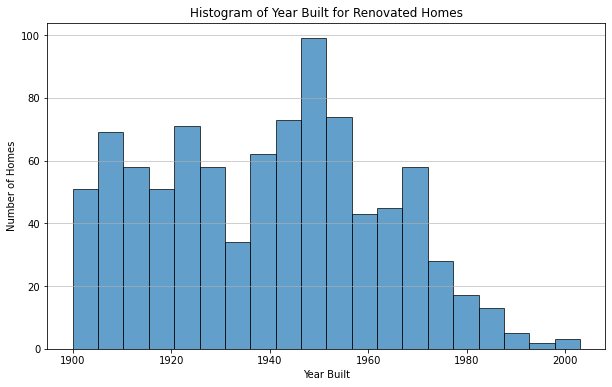

In [236]:
plt.figure(figsize=(10, 6))
plt.hist(renovated['yr_built'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Year Built for Renovated Homes')
plt.xlabel('Year Built')
plt.ylabel('Number of Homes')
plt.grid(axis='y', alpha=0.75)
plt.show()

From the above histogram, we observed:  
(1)An increasing trend of renovations for homes built from the 1940s onwards, peaking around the 1950s.  
(2)Fewer renovations for homes built in more recent decades(from 1975s to 2000s), which may be expected since newer homes might require fewer renovations.  

## What wasn't covered
- handling missing data
- categoricals (setting values to be qualitative categories (e.g. "a", "b", "c" for letter grades)
- merging data (combining multiple dataframes)
- string methods (e.g. lower() to make string lower case)
- time series

# Part 2: Basic Linear Regression (predicting housing prices)

## Simple linear regression: $Y = B_0 + B_1x$
where $Y$ is `price`, and $x$ is `sqft_living`

In [241]:
x_data = df[['sqft_living']]
y_data = df['price']

# split data between train and test set (20% of data for test, rest for training)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=371)

m = LinearRegression() # model

m.fit(x_train, y_train) # fit model to data

intercept = m.intercept_
coefs = m.coef_ # on average, price increases by this much for every increase of 1 x_vars (sqft_living). B/c just 1 x var, this is slope.
print(intercept)
print(coefs)

-57405.355907862424
[287.46247817]


In [242]:
y_pred = m.predict(x_test)
y_pred # predicted prices for homes of certain square foot

array([393910.73482066, 779110.45556984, 419782.35785605, ...,
       698620.96168195, 287549.61789737, 244430.24617172])

(7133, 1)
(7133,)


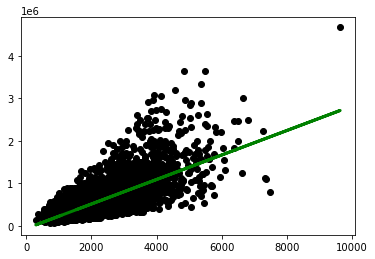

In [243]:
plt.scatter(x_test, y_test, color='black') # plot data

print(x_test.shape)
print(y_test.shape)

plt.plot(x_test.squeeze(), y_pred, color='green', linewidth = 3) # plot regression line of best fit

## Multiple linear regression: $Y = B_0 + B_1X_1 + B_2X_2 + B_3X_3$
where $Y$ is `price` and $X_{1-3}$ is `[sqft_living, bedrooms, waterfront]`

In [246]:
x_cols = ['sqft_living', 'bedrooms', 'waterfront', 'view', 'condition']

x = df[x_cols]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=371)

m2 = LinearRegression()

m2.fit(x_train, y_train)

print(m2.intercept_)
print(m2.coef_)

-68250.91795627621
[ 2.89032231e+02 -4.65209791e+04  5.77843284e+05  6.90160559e+04
  4.20027000e+04]


In [251]:
y_pred = m2.predict(x_test) # use test data to get predicted values
y_pred

array([371974.84700568, 666236.07797343, 397987.74776931, ...,
       600034.48708751, 736155.45769648, 614486.09862286])

In [253]:
residuals = y_test - y_pred # residuals are error between predicted and actual

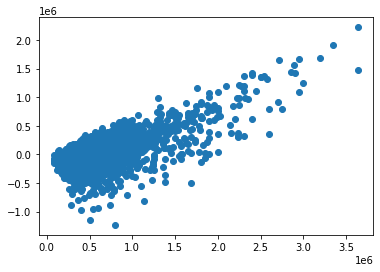

In [255]:
plt.scatter(y_test, residuals) # plot residuals

### TODO #3

1) Create a linear model that predicts `sqft_living` using one other other column (your choice). Test your model with 33% of your data (which should not be used in training). Plot the data and line of best fit. Plot the residuals. How well does a linear model represent this relationship?

2) Create a new linear model using multiple columns to predict `sqft_living`. Test your model with 33% of your data (which should not be used in training). Plot the residuals. How well does a linear model represent this relationship?

In [258]:
# 3.1: fit model
x_data = df[['yr_built']]
y_data = df['sqft_living']

# split data between train and test set
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=371)

m = LinearRegression() # model

m.fit(x_train, y_train) # fit model to data

intercept = m.intercept_
coefs = m.coef_
print(intercept)
print(coefs)

-17588.06947662306
[9.98054485]


In [260]:
y_pred = m.predict(x_test)
y_pred

array([2373.02021429, 2143.46768285, 2203.35095192, ..., 1953.83733078,
       1893.95406171, 1414.88790913])

(7133, 1)
(7133,)


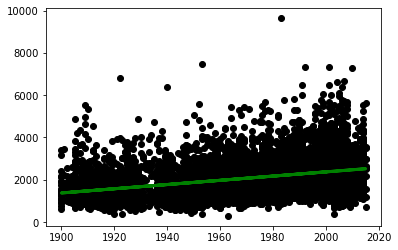

In [262]:
# plot data w/ line of best fit
plt.scatter(x_test, y_test, color='black') # plot data

print(x_test.shape)
print(y_test.shape)
4
plt.plot(x_test.squeeze(), y_pred, color='green', linewidth = 3) # plot regression line of best fit

In [264]:
residuals = y_test - y_pred # residuals are error between predicted and actual
residuals

9857     -803.020214
16196     766.532317
3024     -543.350952
13550    1206.726869
5613     -823.701145
            ...     
19257     326.726869
3661     -924.187524
3570      676.162669
1445     -693.954062
8288     -364.887909
Name: sqft_living, Length: 7133, dtype: float64

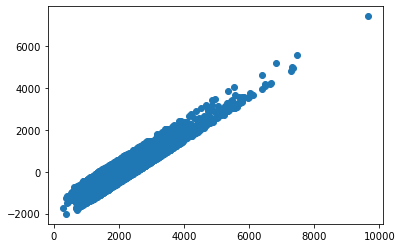

In [266]:
plt.scatter(y_test, residuals) # plot residuals

（改）According to the graph, it indicates a positive correlation between residuals and predicted values, suggesting that the linear model may not fully capture the underlying relationship between sqft_living and year built. Ideally, residuals should be randomly scattered around zero with no discernible pattern. The clustering and pattern observed in the residual plot might imply that the model's predictive accuracy is inconsistent across different levels of predicted values.

In [269]:
#3.2: fit model
x_cols = ['price', 'bedrooms', 'waterfront', 'view', 'condition']

x = df[x_cols]
y = df['sqft_living']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=371)

m3 = LinearRegression()

m3.fit(x_train, y_train)

print(m3.intercept_)
print(m3.coef_)

447.9469427109857
[ 1.45111640e-03  3.76308691e+02 -7.42896862e+02  6.80039046e+01
 -1.26463475e+02]


In [271]:
y_pred = m3.predict(x_test) # use test data to get predicted values
y_pred

array([1914.33409489, 2799.12351247, 1854.83832243, ..., 1603.79518497,
       1607.20662833, 1764.39956233])

In [273]:
residuals = y_test - y_pred # residuals are error between predicted and actual
residuals

9857     -344.334095
16196     110.876488
3024     -194.838322
13550     939.257064
5613     -222.914845
            ...     
19257    -359.603546
3661     -106.892952
3570     1026.204815
1445     -407.206628
8288     -714.399562
Name: sqft_living, Length: 7133, dtype: float64

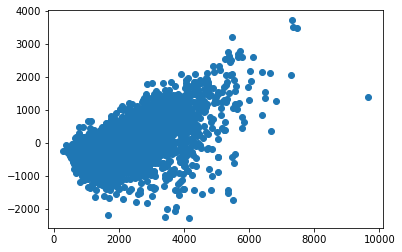

In [275]:
# plot residuals
plt.scatter(y_test, residuals) # plot residuals

(改）According to the graph, it indicates a positive correlation between residuals and predicted values, suggesting that the linear model may not fully capture the underlying relationship between sqft_living and other independent variables. Ideally, residuals should be randomly scattered around zero with no discernible pattern. The clustering and pattern observed in the residual plot might imply that the model's predictive accuracy is inconsistent across different levels of predicted values.